## Problem

The aim of the project is the health of a person according to the given variables.
Estimating how much the insurance will cost.

 ![ Health Insurance ](https://images.app.goo.gl/fTXKLnLheCCgqptr9)

## Importing of Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import random
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("../input/insurance/insurance.csv")
df = df.copy()

## First Look to Data

In [3]:
print("*"*30, "HEAD", "*"*30)
display(df.head(10))
print("*"*30, "DUPLICATED", "*"*30)
print(f"Rows: {df.shape[0]}\nColumns: {df.shape[1]}")
print("*"*30, "INFO", "*"*30)
display(df.info())
print("*"*30, "DESCRIBE", "*"*30)
display(df.describe().T)
print("*"*30, "NULL?", "*"*30)
display(df.isnull().sum())
print("*"*30, "DUPLICATED", "*"*30)
display(df.duplicated().sum())
print("*"*30, "EXPLAINING", "*"*30)


****************************** HEAD ******************************


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


****************************** DUPLICATED ******************************
Rows: 1338
Columns: 7
****************************** INFO ******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

****************************** DESCRIBE ******************************


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


****************************** NULL? ******************************


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

****************************** DUPLICATED ******************************


1

****************************** EXPLAINING ******************************


- According to the first look of data, 
    - There is no null value on dataset.
    - There is only one duplicated value.
    - There are 2 float, 2 int and 3 object types columns.
    - There are 7 features.

### Delete the Duplicated Value

In [4]:
# First, let's delete the duplicated value
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [5]:
df.drop(581, axis=0, inplace=True)

In [6]:
# Now, we have 1337 rows, and 7 columns.
print(f"Rows: {df.shape[0]}\nColumns: {df.shape[1]}")

Rows: 1337
Columns: 7


## Visualization of Data

### Examining of "bmi" Feature

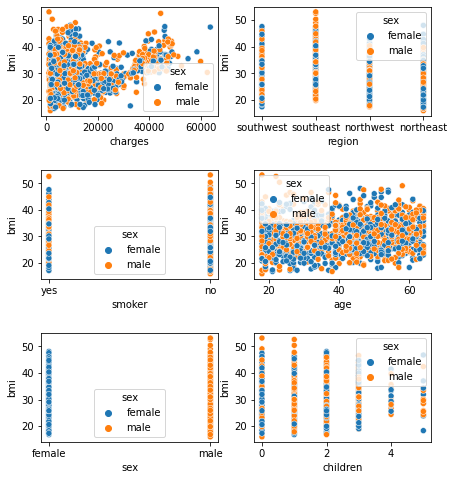

In [7]:
fig, axes = plt.subplots(3,2, figsize=(7, 8))
sns.scatterplot(data=df, x = "charges", y = "bmi", hue = "sex", ax = axes[0,0])
sns.scatterplot(data=df, x = "region", y = "bmi", hue = "sex",ax = axes[0,1])
sns.scatterplot(data=df, x = "smoker", y = "bmi", hue = "sex",ax = axes[1,0])
sns.scatterplot(data=df, x = "age", y = "bmi", hue = "sex",ax = axes[1,1])
sns.scatterplot(data=df, x = "sex", y = "bmi", hue = "sex",ax = axes[2,0])
sns.scatterplot(data=df, x = "children", y = "bmi", hue = "sex",ax = axes[2,1])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5) # It prevents the overlapping of texts

# It seems, there are relationship with the charges and bmi features. Let's into deep.

,charges,bmi
charges,1.000000,0.198401
bmi,0.198401,1.000000


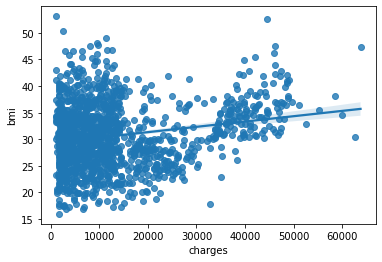

In [8]:
sns.regplot(data=df, x = "charges", y = "bmi")
df[["charges", "bmi"]].corr()

#Correlation number is 0.198, this is a "weak" correlation.

### Smoker and Charges

In [9]:
smoker_yes = df.query('smoker == "yes"')
print("*"*30, "FOR Smoker_yes", "*"*30)
display(smoker_yes.describe().T)
smoker_no = df.query('smoker == "no"')
print("*"*30, "FOR Smoker_no", "*"*30)
display(smoker_no.describe().T)

''' - There are 1063 non smoker and 274 smoker. - Maximum charges value of smoker is much higher than the non smokers. 
- Mean value of charges of smoker is also quite higher than the non smokers. '''


****************************** FOR Smoker_yes ******************************


,count,mean,std,min,25%,50%,75%,max
age,274.0,38.514599,13.923186,18.0000,27.000000,38.00000,49.000000,64.00000
bmi,274.0,30.708449,6.318644,17.1950,26.083750,30.44750,35.200000,52.58000
children,274.0,1.113139,1.157066,0.0000,0.000000,1.00000,2.000000,5.00000
charges,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


****************************** FOR Smoker_no ******************************


,count,mean,std,min,25%,50%,75%,max
age,1063.0,39.404516,14.076133,18.0000,27.0000,40.0000,52.0000,64.00000
bmi,1063.0,30.651853,6.045956,15.9600,26.3150,30.3050,34.4300,53.13000
children,1063.0,1.091251,1.218250,0.0000,0.0000,1.0000,2.0000,5.00000
charges,1063.0,8440.660307,5992.973800,1121.8739,3988.8835,7345.7266,11363.0191,36910.60803


' - There are 1063 non smoker and 274 smoker. - Maximum charges value of smoker is much higher than the non smokers. \n- Mean value of charges of smoker is also quite higher than the non smokers. '

<AxesSubplot:xlabel='age', ylabel='charges'>

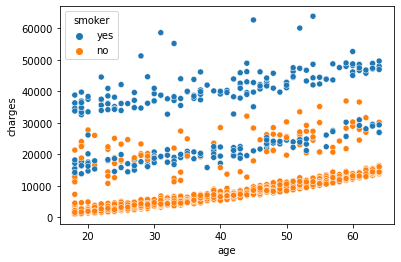

In [10]:
sns.scatterplot(data=df, x = "age", y = "charges", hue = "smoker")
# Also, we can observe from the plot, ıf people are smoker, charges are higher. Let's clearly examine it with groupby function.

In [11]:
df.groupby("smoker")['charges'].mean()
# It is clearly seen, If people are smoker, ınsurance charges are higher.

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

### Smoker and Region

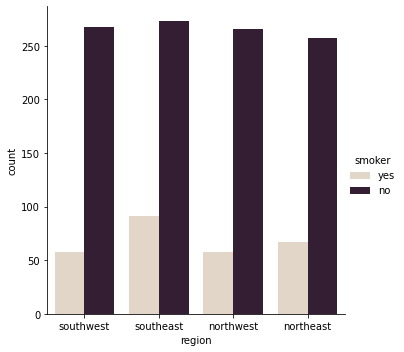

In [12]:
sns.catplot(x="region", kind="count", palette="ch:.25", hue = "smoker", data=df)
# All regions have almost the same smoker size. In addition, southeast region has a little bit more smoker size.

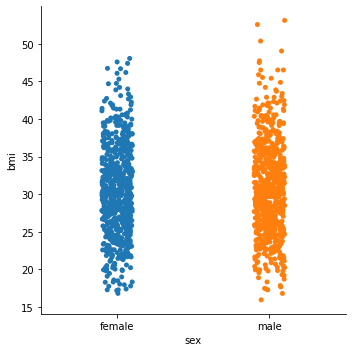

In [13]:
sns.catplot(data=df, x="sex", hue = "sex", y="bmi")
# Both male and female categories have the same intensity in the bmi.

### Which Region Has More Children Count?

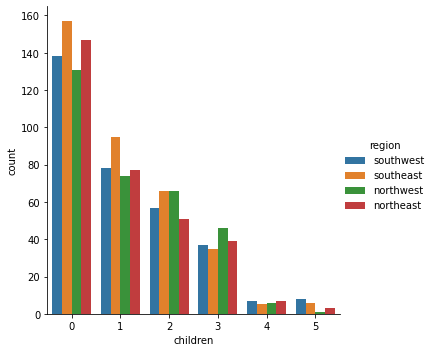

In [14]:
sns.catplot(data=df, x="children", hue = "region", kind = "count")

In [15]:
df.groupby('region')[["children"]].sum()
# Southeast region has most children

,children
region,
northeast,339
northwest,373
southeast,382
southwest,371


### Age and Bmi

          age       bmi
age  1.000000  0.109344
bmi  0.109344  1.000000


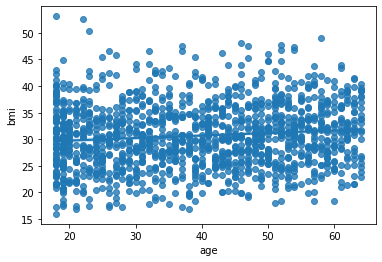

In [16]:
sns.regplot(data=df, x="age", y="bmi")
corr_number = df[["age","bmi"]].corr()
print(f"{corr_number}")
# Correlation number is 0.109, so there is weak correlation.

### Children and Bmi

<AxesSubplot:xlabel='children', ylabel='bmi'>

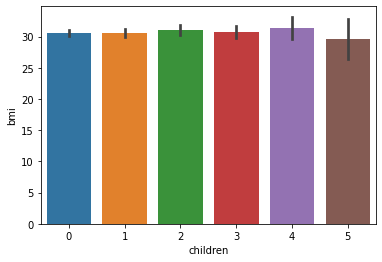

In [17]:
sns.barplot(data=df, x="children", y="bmi")

In [18]:
df.groupby('children')[["bmi"]].mean()
# Everyone who have children or not, have around "30" bmi.

,bmi
children,
0,30.550227
1,30.623148
2,30.978104
3,30.684331
4,31.391200
5,29.605000


### Any outliers in Bmi?

<AxesSubplot:xlabel='bmi'>

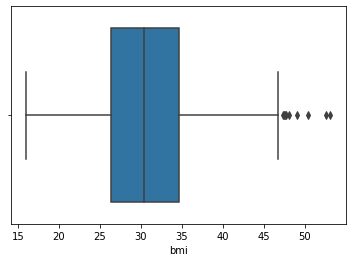

In [19]:
sns.boxplot(data=df, x="bmi")
# It seems there are outliers in bmi feature, let's find how many outliers.

In [20]:
df_bmi = df['bmi']
Q1 = df_bmi.quantile(0.25)
print(f"Q1: {Q1}")
Q3 = df_bmi.quantile(0.75)
print(f"Q3: {Q1}")
IQR = Q3 - Q1
print(f"IQR: {Q1}")
lower_threshold = Q1 - 1.5*IQR
print(f"lower_threshold: {lower_threshold}")
upper_threshold = Q3 + 1.5*IQR
print(f"upper_threshold: {upper_threshold}")

Q1: 26.29
Q3: 26.29
IQR: 26.29
lower_threshold: 13.674999999999994
upper_threshold: 47.31500000000001


In [21]:
# On the boxplot, data has outliers on the upper section. But let's examine both lower and upper boundaries.
upper_outliers_count = df.query(f'bmi > {upper_threshold}')["bmi"].count()
print(f"Upper_outliers_count: {upper_outliers_count}")
lower_outliers_count = df.query(f'bmi < {lower_threshold}')["bmi"].count()
print(f"Lower_outliers_count: {lower_outliers_count}")
# There are 9 outliers only upper section of the bmi feature.

Upper_outliers_count: 9
Lower_outliers_count: 0


#### Fixing of Outliers

In [22]:
# Outliers cause bias so we need to handle with them.
df_bmi = df['bmi']
upper_outliers = df[df_bmi > upper_threshold]
upper_outliers["bmi"] = upper_threshold
upper_outliers
# Upper outliers is equalized to upper threshold value.

,age,sex,bmi,children,smoker,region,charges
116,58,male,47.315,0,no,southeast,11381.32540
286,46,female,47.315,2,no,northeast,9432.92530
401,47,male,47.315,1,no,southeast,8083.91980
543,54,female,47.315,0,yes,southeast,63770.42801
847,23,male,47.315,1,no,southeast,2438.05520
860,37,female,47.315,2,yes,southwest,46113.51100
1047,22,male,47.315,1,yes,southeast,44501.39820
1088,52,male,47.315,1,no,southeast,9748.91060
1317,18,male,47.315,0,no,southeast,1163.46270


In [23]:
# Let's entegrate the new values of 9 outliers on dataframe.
non_outliers = df[~(df["bmi"] > upper_threshold)]
new_df = pd.concat([non_outliers, upper_outliers])
new_df.reset_index(inplace=True)
new_df.drop(columns = ['index'], inplace=True)

<AxesSubplot:xlabel='bmi'>

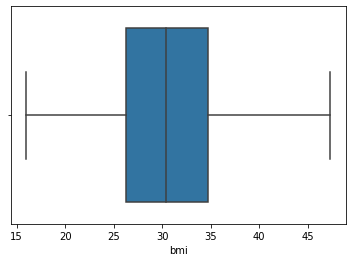

In [24]:
# I'll continue with this new dataframe without outliers.
sns.boxplot(data=new_df, x="bmi")

### Bmi, Region and Smoker

<AxesSubplot:xlabel='region', ylabel='bmi'>

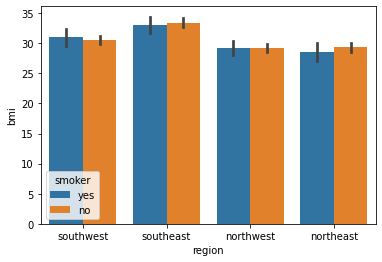

In [25]:
sns.barplot(data=new_df, x="region", y="bmi", hue="smoker")
# In all regions smoker and nonsmoker people have around 30 bmi point.

## Preparing for the Machine Learning Model

### Encoding

In [26]:
new_df.head()
# In "sex" and "smoker" features there are 2 independent values, so we can change them with label encoding.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
# Label Encoding of "sex" feature.
lbe = LabelEncoder()
new_df["new_sex"] = lbe.fit_transform(df['sex'])
new_df

,age,sex,bmi,children,smoker,region,charges,new_sex
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1332,23,male,47.315,1,no,southeast,2438.05520,1
1333,37,female,47.315,2,yes,southwest,46113.51100,0
1334,22,male,47.315,1,yes,southeast,44501.39820,0
1335,52,male,47.315,1,no,southeast,9748.91060,0


In [28]:
# Label Encoding of "smoker" feature.
lbe = LabelEncoder()
new_df["new_smoker"] = lbe.fit_transform(df['smoker'])
new_df

,age,sex,bmi,children,smoker,region,charges,new_sex,new_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1332,23,male,47.315,1,no,southeast,2438.05520,1,0
1333,37,female,47.315,2,yes,southwest,46113.51100,0,0
1334,22,male,47.315,1,yes,southeast,44501.39820,0,0
1335,52,male,47.315,1,no,southeast,9748.91060,0,0


In [29]:
# Let's delete the old categorical values of "sex" and "smoker" features.
new_df.drop(columns = ["sex", "smoker"], axis=1, inplace=True)

In [30]:
# For region feature, we have 4 categorical variables, so we need to change them into integers with one-hot encoding.
last_df = pd.get_dummies(new_df, columns = ["region"], prefix = ["region"])
last_df

,age,bmi,children,charges,new_sex,new_smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1332,23,47.315,1,2438.05520,1,0,0,0,1,0
1333,37,47.315,2,46113.51100,0,0,0,0,0,1
1334,22,47.315,1,44501.39820,0,0,0,0,1,0
1335,52,47.315,1,9748.91060,0,0,0,0,1,0


### Splitting of DataFrame and Normalization

In [31]:
# We need to columns names when converting normalized array to dataframe.
names = []
for i in range(10):
    columns_ = last_df.columns[i]
    names.append(columns_)
names

['age',
 'bmi',
 'children',
 'charges',
 'new_sex',
 'new_smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [32]:
last_df = preprocessing.normalize(last_df)
last_df = pd.DataFrame(last_df, columns=names)
X = last_df.drop("charges",axis=1)
y = last_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [33]:
X_train.head()

,age,bmi,children,new_sex,new_smoker,region_northeast,region_northwest,region_southeast,region_southwest
762,0.005957,0.004113,0.000142,0.000142,0.0,0.000000,0.00000,0.000000,0.000142
1078,0.005094,0.002684,0.000000,0.000093,0.0,0.000093,0.00000,0.000000,0.000000
178,0.004802,0.003883,0.000351,0.000000,0.0,0.000117,0.00000,0.000000,0.000000
287,0.002001,0.001016,0.000115,0.000000,0.0,0.000000,0.00000,0.000038,0.000000
1289,0.006272,0.005218,0.000380,0.000000,0.0,0.000000,0.00019,0.000000,0.000000


## Model Fitting

In [34]:
linear_model = LinearRegression().fit(X_train,y_train)
ridge_model = Ridge().fit(X_train, y_train)
lasso_model = Lasso().fit(X_train,y_train)
knn_model = KNeighborsRegressor().fit(X_train, y_train)
svr_model = SVR().fit(X_train, y_train)
rf_model = RandomForestRegressor().fit(X_train,y_train)
lgbm_model = LGBMRegressor().fit(X_train,y_train)
cart_model = DecisionTreeRegressor().fit(X_train,y_train)
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

model_list = [linear_model, ridge_model,lasso_model,knn_model,svr_model,rf_model,lgbm_model,cart_model,gbm_model]
rmse_list = []

for i in model_list:
    cross_val_score(i, X_train, y_train, cv = 10, scoring= "neg_mean_squared_error")
    mse = np.mean(-cross_val_score(i, X_train, y_train, cv = 10, scoring= "neg_mean_squared_error"))
    print(f"For {i} mse is: {mse}")


For LinearRegression() mse is: 4.175397104382372e-10
For Ridge() mse is: 6.353296373877664e-09
For Lasso() mse is: 6.716141030938876e-09
For KNeighborsRegressor() mse is: 7.894135968944229e-11
For SVR() mse is: 1.3840362601230082e-07
For RandomForestRegressor() mse is: 4.035042358756965e-11
For LGBMRegressor() mse is: 4.0749053888537664e-10
For DecisionTreeRegressor() mse is: 4.450045719822265e-11
For GradientBoostingRegressor() mse is: 1.6077907204141097e-11


## Model Tunning

***After the model fitting and cross validation, I choosed SVR model. 
Now, it is time to model tunning with hyperparemeters and GridSearchCV***

In [35]:
random_params = np.random.random_sample(size = 20)
svr_params = {"C": random_params}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=5, n_jobs = -1).fit(X_train, y_train)

In [36]:
# Best "C" value
svr_cv_model.best_params_

{'C': 0.7925956879025888}

In [37]:
svr_tuned = SVR(C= svr_cv_model.best_params_["C"]).fit(X_train,y_train)
y_pred = svr_tuned.predict(X_test)
mean_squared_error(y_test,y_pred)
# After the all operations, lastly "mse" is 1.428.

1.4281997800643907e-07